<a href="https://colab.research.google.com/github/VIVEKRAJ23/My-files/blob/master/Object_Detection_Final9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Object Detection from Images**

In [1]:
import numpy as np 
import tensorflow as tf
import pandas as pd
import tensorflow.keras
from tensorflow.keras.datasets import cifar10

### **Loading the dataset**

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [4]:
print(x_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 1)


In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

#### **Re-scaling so that all the pixel values lie within 0 to 1**

In [7]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [8]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [9]:
no_of_classes = len(np.unique(y_train))
no_of_classes

10

### **Transforming it into One-hot Encoded form**

In [10]:
y_train = tensorflow.keras.utils.to_categorical(y_train,no_of_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test,no_of_classes)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

### **Dividing our training set into 2 sets - train and validation**

In [11]:
x_train,x_valid = x_train[5000:],x_train[:5000]
y_train,y_valid = y_train[5000:],y_train[:5000]
print(x_train.shape)
print(y_train.shape)

(45000, 32, 32, 3)
(45000, 10)


In [12]:
print(x_valid.shape)
print(y_valid.shape)

(5000, 32, 32, 3)
(5000, 10)


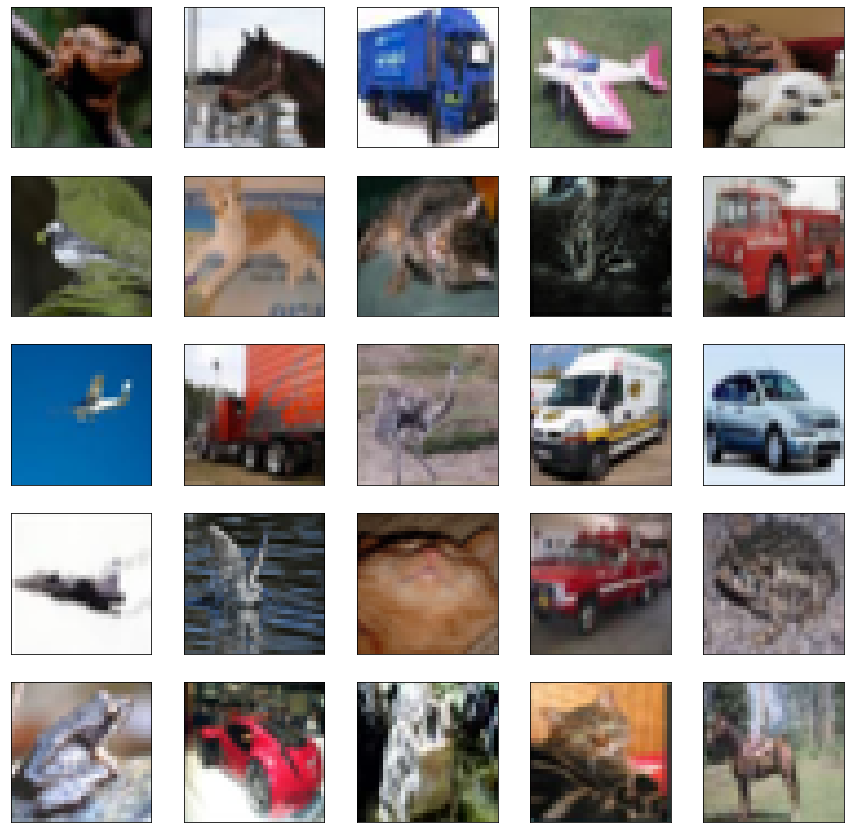

In [13]:
#Showing the pictures of First 20 images from training data set
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))
for i in range(25):
    ax = fig.add_subplot(5,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    

## **Creating Model**

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=16, kernel_size = 2, padding = 'same',activation = 'relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size = 2, padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size = 2, padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0

### **Compiling model**

In [15]:
model.compile(optimizer = 'adam', loss ='categorical_crossentropy',metrics=['accuracy'])
print('Model compiled!')

Model compiled!


### **Start training the model - 3..... 2...... 1...... Go**

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath = 'best_model_.h5',save_best_only = True,verbose=1) #Save the best model in the file path

history = model.fit(x_train,y_train,batch_size=32, epochs = 20,
          validation_data=(x_valid,y_valid),
          callbacks=[checkpoint],
          verbose=1)

Epoch 1/20
1407/1407 [==============================] - ETA: 0s - loss: 1.5636 - accuracy: 0.4294
Epoch 00001: val_loss improved from inf to 1.26814, saving model to best_model_.h5
1407/1407 [==============================] - 5s 4ms/step - loss: 1.5636 - accuracy: 0.4294 - val_loss: 1.2681 - val_accuracy: 0.5536
Epoch 2/20
1403/1407 [============================>.] - ETA: 0s - loss: 1.2609 - accuracy: 0.5491
Epoch 00002: val_loss improved from 1.26814 to 1.11085, saving model to best_model_.h5
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2605 - accuracy: 0.5492 - val_loss: 1.1109 - val_accuracy: 0.6098
Epoch 3/20
1400/1407 [============================>.] - ETA: 0s - loss: 1.1256 - accuracy: 0.5988
Epoch 00003: val_loss improved from 1.11085 to 1.00521, saving model to best_model_.h5
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1260 - accuracy: 0.5985 - val_loss: 1.0052 - val_accuracy: 0.6464
Epoch 4/20
1403/1407 [============================

### **Checking the accuracy score of the best model on our test dataset**

In [17]:
model.load_weights('best_model_.h5')
score = model.evaluate(x_test,y_test,verbose=0)
score[1]*100

#Accuracy ranging from 73% to 78%

73.83000254631042

### **Visualizing the accuracy and loss over the epochs**


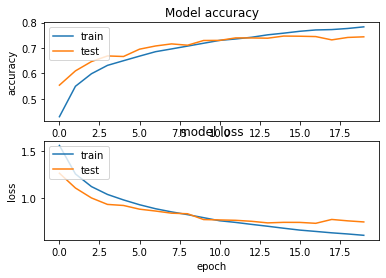

In [18]:
plt.figure(1)  
   
#summarizing history for accuracy  

plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('Model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   

#summarizing history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

**==========================================================================================================**

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [24]:
# from google.colab import files
# uploaded = files.upload()

# **Pre-trained Model using VGG-16**

In [21]:
import numpy as np
import pandas as pd
from numpy.random import rand
pd.options.display.max_colwidth = 600

In [25]:
import tensorflow as tf
from keras import callbacks
from keras import optimizers
from keras.engine import Model
from keras.applications import vgg16 as vgg
import cnn_utils as utils
from cnn_utils import plot_predictions
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [26]:
BATCH_SIZE = 32
EPOCHS = 100
NUM_CLASSES = 10
LEARNING_RATE = 1e-4
MOMENTUM = 0.9

Since I am using VGG16 as a feature extractor, the minimum size of an image it takes is 48x48.

In [27]:
from skimage.transform import resize
from skimage import data
x = data.camera()
X_train = np.array([resize(x, (48, 48)) for x in x_train])
X_val = np.array([resize(x, (48, 48)) for x in x_valid])
X_test = np.array([resize(x, (48, 48)) for x in x_test])

## **Preparing the Model**

In [28]:
vgg_model = vgg.VGG16(weights='imagenet', 
                       include_top=False, 
                       input_shape=(48, 48, 3))
last = vgg_model.get_layer('block3_pool').output

58892288/58889256 [==============================] - 2s 0us/step


 Adding Classification layers on top of it

In [29]:
x = GlobalAveragePooling2D()(last)
x= BatchNormalization()(x)
x = Dense(120, activation='relu')(x)
x = Dense(120, activation='relu')(x)
x = Dropout(0.6)(x)
pred = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(vgg_model.input, pred)

Only training the custom classifier, we freeze the layers of VGG16

In [30]:
for layer in vgg_model.layers:
     layer.trainable = False

## **Compiling VGG16 model**

In [31]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=LEARNING_RATE),
              metrics=['accuracy'])

print('Model compiled!')

Model compiled!


In [32]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

##  **Data Augmentation** 

In [33]:
data_augmentation = True

In [34]:
from keras.callbacks import ModelCheckpoint

checkpoint1 = ModelCheckpoint(filepath = 'Best_Model_Pretrained_.h5',save_best_only = True,verbose=1)

### **Start training the VGG16 model - 3..... 2...... 1...... Go**

In [35]:
if data_augmentation :
    
    print(">--------------------------------------->>         Using Data augmentation      <<--------------------------------------------<")
     

    datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False, 
        zca_whitening=False, 
        rotation_range=0, 
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip=True, 
        vertical_flip=False) 
    
    datagen.fit(x_train)
    history1 = model.fit_generator(datagen.flow(X_train, y_train, BATCH_SIZE),
                        steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
                        epochs=20,
                        verbose=1,
                        validation_data=(X_val,y_valid),
                        callbacks=[checkpoint1])
    
else :


    print(">--------------------------------------->>        Not Using Data augmentation      <<--------------------------------------------<")
   
    history1 = model.fit(X_train,y_train,
                         batch_size=32, 
                         epochs = 20,
                        validation_data=(X_val,y_valid),
                        callbacks=[checkpoint1],
                        verbose=1)

>--------------------------------------->>         Using Data augmentation      <<--------------------------------------------<
Epoch 1/20
1406/1406 [==============================] - 34s 24ms/step - loss: 0.2841 - accuracy: 0.9017 - val_loss: 0.2182 - val_accuracy: 0.9160

Epoch 00001: val_loss improved from inf to 0.21824, saving model to Best_Model_Pretrained_.h5
Epoch 2/20
1406/1406 [==============================] - 34s 24ms/step - loss: 0.2327 - accuracy: 0.9117 - val_loss: 0.1906 - val_accuracy: 0.9271

Epoch 00002: val_loss improved from 0.21824 to 0.19059, saving model to Best_Model_Pretrained_.h5
Epoch 3/20
1406/1406 [==============================] - 35s 25ms/step - loss: 0.2124 - accuracy: 0.9184 - val_loss: 0.1748 - val_accuracy: 0.9325

Epoch 00003: val_loss improved from 0.19059 to 0.17482, saving model to Best_Model_Pretrained_.h5
Epoch 4/20
1406/1406 [==============================] - 34s 24ms/step - loss: 0.2006 - accuracy: 0.9227 - val_loss: 0.1667 - val_accuracy: 0.

### **Checking the accuracy score of the best model on our test dataset**

In [36]:
model.load_weights('Best_Model_Pretrained_.h5')
_,score1 = model.evaluate(X_train,y_train,verbose=0)
_,score2 = model.evaluate(X_test,y_test,verbose=0)

print('Train: %.5f, Test: %.5f' % (score1*100, score2*100))

# Getting accuracy of around 95%

Train: 95.11378, Test: 94.73798


 ### **Visualizing the accuracy and loss over the epochs**


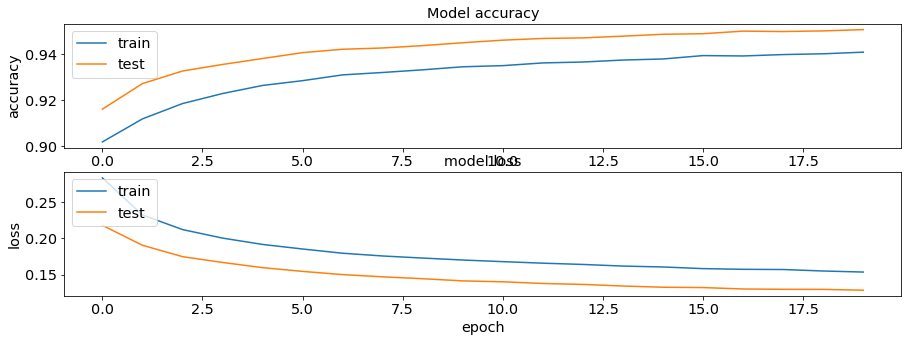

In [37]:
plt.figure(1)  
   
#summarizing history for accuracy  

plt.subplot(211)  
plt.plot(history1.history['accuracy'])  
plt.plot(history1.history['val_accuracy'])  
plt.title('Model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   

#summarizing history for loss  
   
plt.subplot(212)  
plt.plot(history1.history['loss'])  
plt.plot(history1.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

In [38]:
predictions = model.predict(X_test/255.)
test_labels = list(y_test.squeeze())
predictions = list(predictions.argmax(axis=1))

### **Visualizing Predictions**

In [39]:
label_dict = {0:'airplane',
             1:'automobile',
             2:'bird',
             3:'cat',
             4:'deer',
             5:'dog',
             6:'frog',
             7:'horse',
             8:'ship',
             9:'truck'}

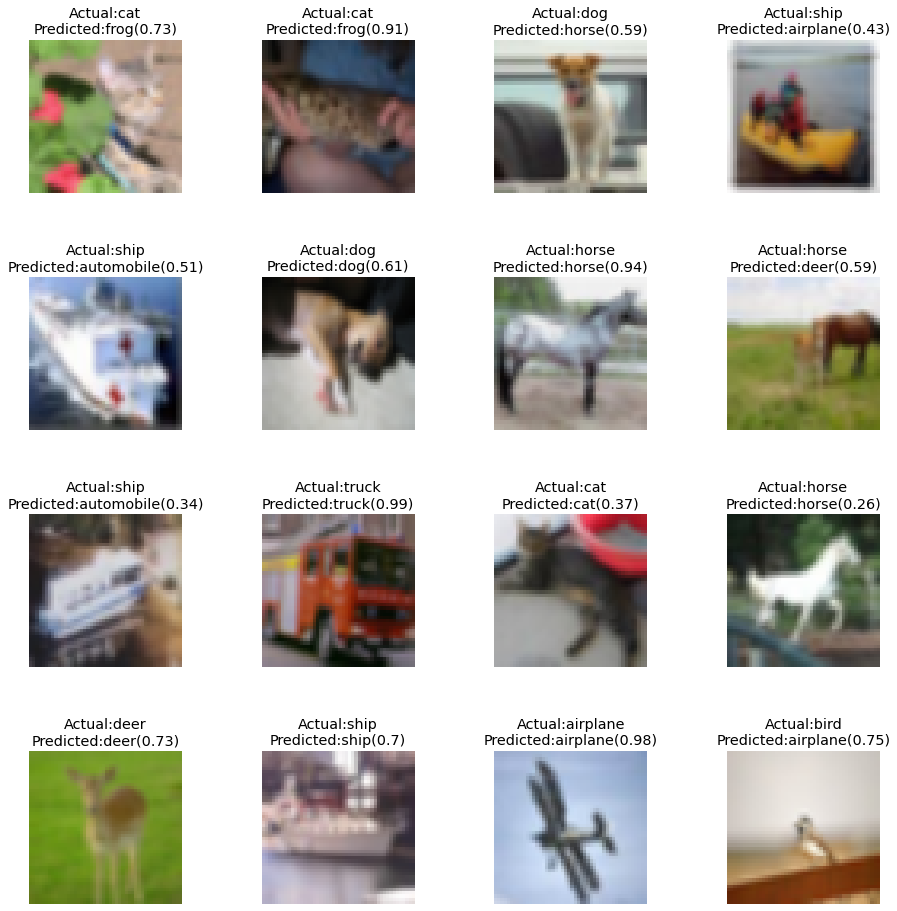

In [40]:
utils.plot_predictions(model=model,dataset=X_test,
                       dataset_labels=y_test,
                       label_dict=label_dict,
                       batch_size=20,
                       grid_height=4,
                       grid_width=4)

In [ ]:
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

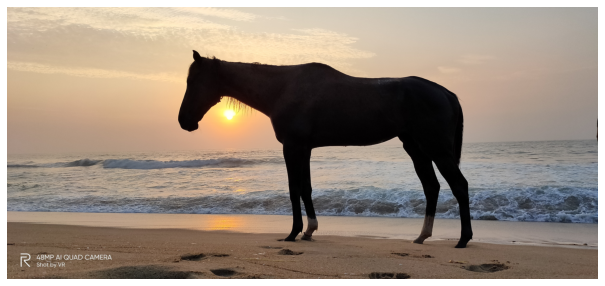

In [203]:
image = cv2.imread("/content/drive/My Drive/0bj detect images/object detection/3.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb), plt.axis("off")
plt.show()

In [204]:
def load_image(filename):
    
    img = load_img(filename, target_size=(48, 48))
    img = img_to_array(img)
    img = img.reshape(1, 48, 48, 3)
    img = img.astype('float32')
    img = img / 255.0
    return img
 
def run_example():
    img = load_image('/content/drive/My Drive/0bj detect images/object detection/3.jpg')
    model = load_model('Best_Model_Pretrained_.h5')
    result = model.predict(img)
    print("Prediction Probab :",result)
    return np.argmax(result,axis=1)
 
res= run_example()
predictions = [label_dict[k] for k in res]
print("Predicted Label:",predictions)

Prediction Probab : [[1.1141303e-02 1.9407156e-04 5.8029760e-03 6.6381111e-04 1.2439651e-01
  4.6875290e-04 7.6736942e-06 8.5634887e-01 2.2582516e-04 7.5015775e-04]]
Predicted Label: ['horse']


In [ ]:
# label_dict = {0:'airplane',
#              1:'automobile',
#              2:'bird',
#              3:'cat',
#              4:'deer',
#              5:'dog',
#              6:'frog',
#              7:'horse',
#              8:'ship',
#              9:'truck'}